<a href="https://colab.research.google.com/github/adhithyan46/Deep-Learning/blob/main/california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# California Housing

predicting the median housing value and high/low income with both numerical input and categorical input


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,Binarizer
from sklearn.datasets import fetch_california_housing

fetching the dataset

In [2]:
data = fetch_california_housing()

In [3]:
x = pd.DataFrame(data.data, columns = data.feature_names)
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


There are two output (target)


*   median housing value
*   high/low income (binary classification)



In [27]:
y_median_housing_value = data.target
y_high_income = Binarizer(threshold = 3.5).fit_transform(x[['MedInc']]).ravel()
y_high_income,y_median_housing_value

(array([1., 1., 1., ..., 0., 0., 0.]),
 array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]))

In [6]:
x_train,x_test,y_median_train,y_median_test,y_income_train,y_income_test = train_test_split(x, y_median_housing_value,
                                                                                            y_high_income,test_size =0.2,random_state = 42)

In [7]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [8]:
x_train

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]])

In [9]:
x_test

array([[-1.14237625, -0.30073951, -0.43367721, ...,  0.52022395,
         0.22194113,  0.25541734],
       [-0.69050482,  0.098724  , -0.13050312, ..., -0.16293193,
        -0.20947715,  0.02976613],
       [-0.18616932,  1.85636346, -0.51063381, ..., -0.91557569,
         1.03788441, -1.46454628],
       ...,
       [ 2.87008893, -0.30073951,  0.65618087, ..., -0.09978765,
         0.80810728, -1.2689819 ],
       [-0.55565035,  0.57808022, -0.04116447, ..., -0.21494651,
         0.5548835 , -0.120668  ],
       [-0.14789765, -0.93988113, -0.50645235, ...,  0.43607226,
        -0.64089543,  0.57634349]])

In [10]:
input_layer = Input(shape=(x_train.shape[1],),name = 'numerical_input')

In [11]:
x1 = Dense(64,activation = 'relu')(input_layer)
x1 = Dense(32, activation = 'relu')(x1)

In [12]:
median_housing_value_output = Dense(1, name = 'median_housing_value_output')(x1)
high_income_output = Dense(1, activation = 'sigmoid', name = 'high_income_output')(x1) #sigmoid for binary classification

In [13]:
model = Model(
    inputs = input_layer,
    outputs = [median_housing_value_output, high_income_output]
)

In [14]:
model.compile(
    optimizer = 'adam',
    loss = {'median_housing_value_output':'mse','high_income_output':'binary_crossentropy'},
    metrics = {'median_housing_value_output':'mae','high_income_output':'accuracy'}
)

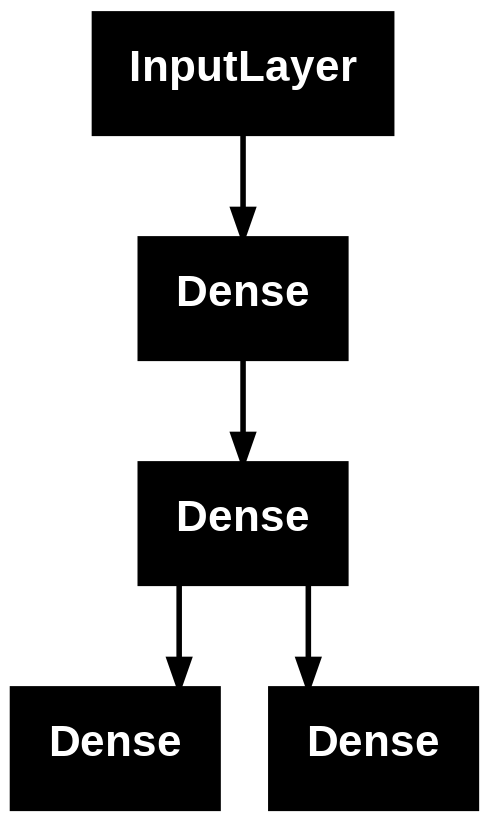

In [15]:
keras.utils.plot_model(model, "my_first_model.png")

In [16]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ numerical_input           │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 64)             │            576 │ numerical_input[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 32)             │          2,080 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ median_housing_value_out… │ (None, 1)              │             33 │ dense_1[0][0]          │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ high_income_output        │ (None, 1)              │             33 │ dense_1[0][0]          │
│ (Dense)                   │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,722 (10.63 KB)

 Trainable params: 2,722 (10.63 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(x_train,
                    {'median_housing_value_output':y_median_housing_value,'high_income_output':y_high_income},
                    epochs = 10,
                    batch_size = 32,
                    validation_split = 0.1)

Epoch 1/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - high_income_output_accuracy: 0.4994 - loss: 3.2962 - median_housing_value_output_mae: 1.1157 - val_high_income_output_accuracy: 0.5000 - val_loss: 2.3441 - val_median_housing_value_output_mae: 0.9771
Epoch 2/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - high_income_output_accuracy: 0.5037 - loss: 2.0544 - median_housing_value_output_mae: 0.8789 - val_high_income_output_accuracy: 0.4570 - val_loss: 2.3068 - val_median_housing_value_output_mae: 0.9653
Epoch 3/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - high_income_output_accuracy: 0.5114 - loss: 2.0163 - median_housing_value_output_mae: 0.8878 - val_high_income_output_accuracy: 0.5188 - val_loss: 2.2801 - val_median_housing_value_output_mae: 0.9627
Epoch 4/10
465/465 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - high_income_output_accuracy: 0.5245 - loss: 1.9567 - median_housing_value_output_mae: 0.8689 - val_high_income_output_accuracy: 0.4600 - val_loss: 2.3073 - val_median_housing_value_out

In [18]:
y_pred = model.predict(x_test)
median_housing_value = y_pred[0]
high_income_value = y_pred[1]

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [19]:
print('predicted median_housing value:',median_housing_value[:5])
print('predicted high income:',high_income_value[:5])

predicted median_housing value: [[2.0838969]
 [1.9917555]
 [1.9222443]
 [1.93115  ]
 [1.9869542]]
predicted high income: [[0.51813066]
 [0.5090942 ]
 [0.48240408]
 [0.5039798 ]
 [0.48765755]]


In [20]:
predicted_high_income_labels = (high_income_value > 0.5).astype(int)
print("Predicted High Income Labels:", predicted_high_income_labels[:5])

Predicted High Income Labels: [[1]
 [1]
 [0]
 [1]
 [0]]


In [23]:
test_loss,test_mae_median, test_accuracy_income = model.evaluate(
    x_test,
    {'median_housing_value_output':y_median_test,'high_income_output':y_income_test}
)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - high_income_output_accuracy: 0.4116 - loss: 2.0955 - median_housing_value_output_mae: 0.9193


In [24]:
print('Test Mean absolute error for median house value:',test_mae_median)
print('Test accuracy for high income :',test_accuracy_income)

Test Mean absolute error for median house value: 0.4060077667236328
Test accuracy for high income : 0.9166443943977356
